## 6.01 - Supervised Learning Model Comparison

Recall the "data science process."

1. Define the problem.
2. Gather the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./401ksubs.csv')

In [3]:
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


##### 2. What are 2-3 other variables that, if available, would be helpful to have?

1. For people who already have 401k and ira, how much have they already contributed. Have they reached the limit?
2. Credit score
3. Type of job: full-time vs. part-time
4. Industry of the job
5. Education
6. Debt ratio

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

Because using race as a criteria for 401K application is an act of racial descrimination.

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

Answer:
**Gender** would not a reasonable feature to use. 
1. Because now male and female are suppose to get paid equally.
2. Using gender as the feature triggers ethical problem (i.e., gender discrimination).

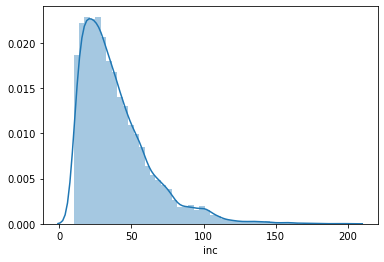

In [8]:
# Histagram for Inc
sns.distplot(df['inc']);

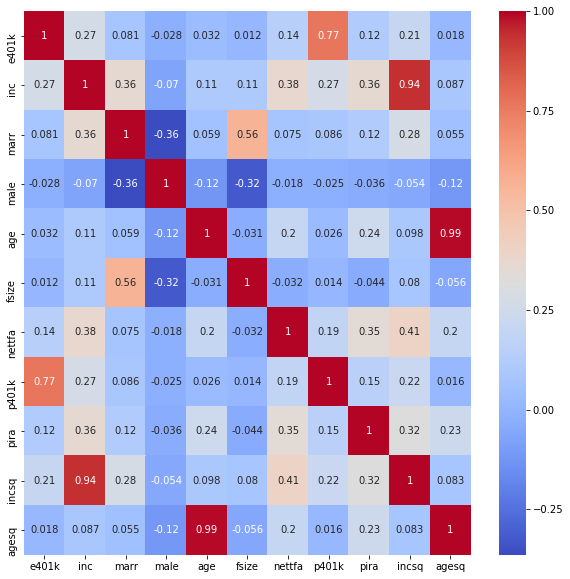

In [4]:
# Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

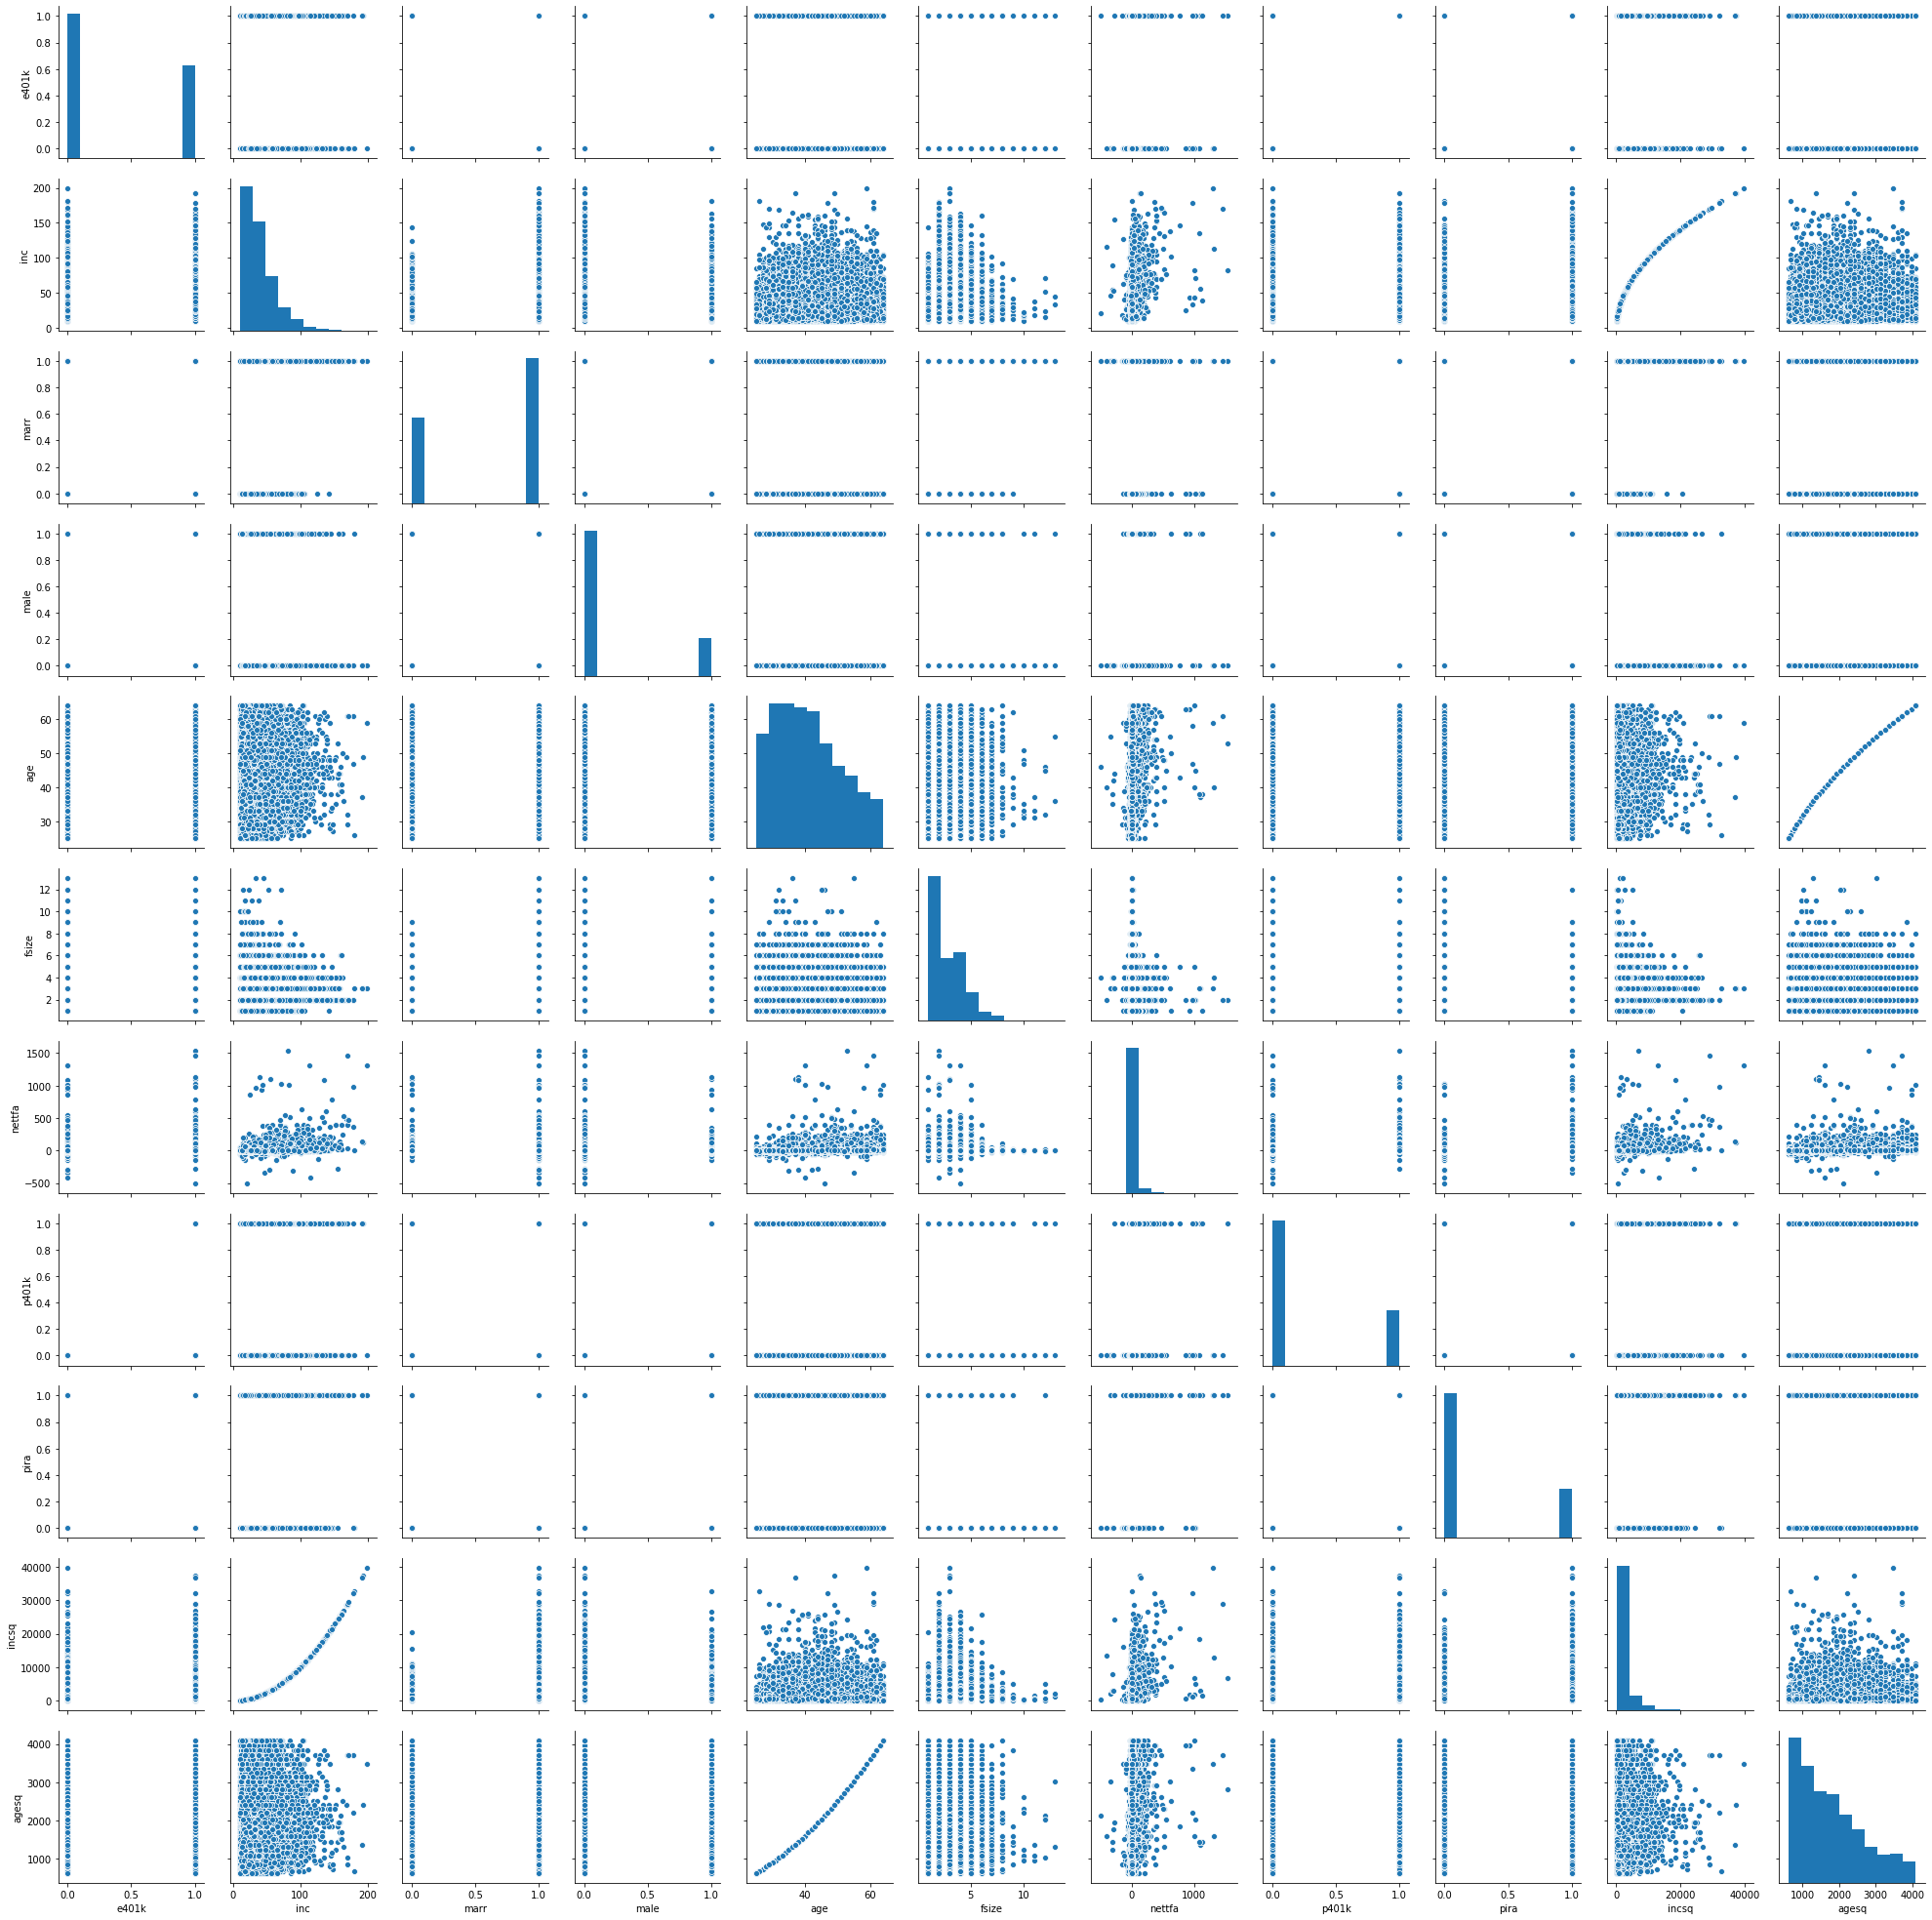

In [5]:
sns.pairplot(df)

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

To emphasize the change of income and age which benefits the regression and classification algorithms,.

The following two feature have already been engineered:
1. Square of Income
2. Square of Age

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

The description for **inc** and **age** are incorrect. Currently are **inc^2** and **age^2**, respectively. Should be:
1. **inc**: income, \$1000
2. **age**: age, year

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

Answer:
1. multiple linear regression
2. lasso regression
3. ridge regression

Because income is a continuous dependent variable, we shoud use Linear Regression

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector regressor
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

##### - 8.0 Import Libraries

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

##### - 8.1 Feature Engineering & X and y

In [11]:
# log transform inc (normal distribution)
df['log_inc'] = np.log(df['inc'])
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq,log_inc
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600,2.577942
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225,4.114637
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936,2.553966
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936,4.593907
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809,3.118569


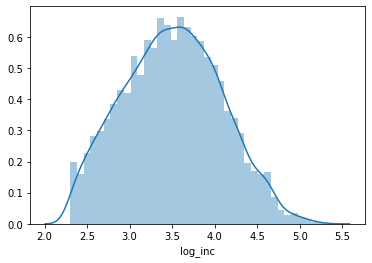

In [13]:
# plot log_inc
sns.distplot(df['log_inc']);

In [14]:
# Features
feat_inc = ['marr', 
            'age',
            'male',
            'fsize', 
            'nettfa', 
            'agesq'
           ]

In [15]:
# Set X and y
X = df[feat_inc]
y = df['log_inc']

##### - 8.2 Train/Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6956, 6) (2319, 6) (6956,) (2319,)


##### - 8.3 Instantiate the Models

In [19]:
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
knn = KNeighborsRegressor(n_neighbors=10)
tree = DecisionTreeRegressor(min_samples_leaf=35)
bag = BaggingRegressor(n_estimators=500, max_features=3)
forest = RandomForestRegressor(n_estimators=500, min_samples_leaf=35)
ada = AdaBoostRegressor()
svr = SVR()

##### - 8.4 Scale

In [20]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

/Users/kaizhao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/kaizhao/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/kaizhao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


##### - 8.5 Fit and Transform

In [21]:
models = [lr, lasso, ridge, knn, tree, bag, forest, ada, svr]
model_names = ['lr', 'lasso', 'ridge', 'knn', 'tree', 'bag', 'forest', 'ada', 'svr']

y_preds = [] # prediction from X_test
y_exams = [] # verification from X_train
for model in models:
    model.fit(X_train_sc, y_train)
    y_preds.append(model.predict(X_test_sc))
    y_exams.append(model.predict(X_train_sc))
y_preds_df = pd.DataFrame(y_preds, index=model_names).T
y_exams_df = pd.DataFrame(y_exams, index=model_names).T
y_preds_df.head()

,lr,lasso,ridge,knn,tree,bag,forest,ada,svr
0,3.700379,3.504111,3.698642,3.506703,3.690767,3.627095,3.760361,3.681280,3.748712
1,3.627092,3.504111,3.627256,3.257042,3.184900,3.294067,3.183932,3.374706,3.631571
2,3.333358,3.504111,3.332344,3.623528,3.451232,3.373829,3.400959,3.459823,3.331019
3,3.030464,3.504111,3.031321,3.151919,3.210303,3.406922,3.128068,3.396129,2.961540
4,3.625649,3.504111,3.625813,3.423380,3.295240,3.278525,3.335498,3.401798,3.626141


##### - 8.6 R_Square Scores

In [22]:
scores = {'train': [], 'test': []}
for model in models:
    scores['train'].append(model.score(X_train_sc, y_train))
    scores['test'].append(model.score(X_test_sc, y_test))

score_df = pd.DataFrame(scores, index=model_names)
score_df

,train,test
lr,0.288837,0.279701
lasso,0.000000,-0.000022
ridge,0.288827,0.279407
knn,0.452929,0.366976
tree,0.460509,0.409833
bag,0.641272,0.326135
forest,0.462575,0.430168
ada,0.387010,0.373793
svr,0.383171,0.373414


In [40]:
# Importance of Features
weight_df = pd.DataFrame(ada.feature_importances_, index=feat_inc, columns=['weight'])
weight_df.sort_values(by='weight', ascending=False)

,weight
nettfa,0.724241
marr,0.210659
agesq,0.031418
age,0.018541
male,0.012448
fsize,0.002693


##### 9. What is bootstrapping?

Random sampling with replacement

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

Instead of a single decision tree. Bagging chooses subsets of data from training sample randomly with replacement. The purpose is to reduce variance or overfitting.

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

A set of bagged decision tree all have the exact same features as the original data. Random forest constructs trees with randomly selected subset of features from the original database.

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

Because random forest subsets usually chose less features, for each tree, the bias increase while variance decreases. However, the bias are areveraged out by large number of random trees. Therefore, compared to bagged decision trees, rrandom forest tends to have lower variance without significantly sacrificing bias.

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [23]:
rmse = {'train': [], 'test': []}

for model_name in model_names:
    rmse['train'].append(np.sqrt(((np.exp(y_train) - np.exp(y_exams_df[model_name]))**2).mean()))
    rmse['test'].append(np.sqrt(((np.exp(y_test) - np.exp(y_preds_df[model_name]))**2).mean()))

rmse_df = pd.DataFrame(rmse, index=model_names)
rmse_df['over_fit'] = rmse_df['train'] - rmse_df['test']
rmse_df

,train,test,over_fit
lr,39.295684,27.454635,11.841049
lasso,24.878957,24.844094,0.034864
ridge,39.316038,27.442289,11.873749
knn,28.570070,28.851143,-0.281073
tree,28.795700,29.047984,-0.252283
bag,26.732969,26.247064,0.485905
forest,28.333110,28.709737,-0.376627
ada,26.728183,26.895959,-0.167776
svr,28.757624,29.180207,-0.422582


##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

Based on the RMSE score above, **Linear Regression** and **Ridge Regression** are significantly overfit.

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

I would pick AdaBoost due to its low RMSE and consistent R2 (almost no overfitting).

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

1. Conduct additional feature engineering/transformation.
2. Test wider range of hyperparameters.
3. Test different regularizations for the linear models.

## Step 5: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

Answer:

People who already have 401(k) account are already proved his/her eligibility. However, because 401(k) has its contribution limit, and people who have 401(k) are likely either reach the maximum contribution limit for tax benefit or contributed up to the amount they feel comfortable. Therefore, though those people are eligible based on the given data, but are actually not eligible (especially without how much they have already contributed to the existing accounts). 

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

1. logistic regression
2. k-nearest neighbors
3. naive Bayes
4. decision tree
5. random forest
6. a set of bagged decision tree
7. adaboost
8. gradient boost
9. support vector classifier

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector classifier
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

##### - 19.1 Import Libraries

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

##### - 19.2 X and y

In [25]:
df.head(2)

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq,log_inc
0,0,13.17,0,0,40,1,4.575,0,1,173.4489,1600,2.577942
1,1,61.23,0,1,35,1,154.000,1,0,3749.1130,1225,4.114637


In [26]:
feat_401k = ['inc',
             'marr', 
             'age', 
             'fsize',
             'nettfa',
             'p401k',
             'pira',
             'incsq',
             'agesq']

X_401k = df[feat_401k]
y_401k = df['e401k']

##### -19.3 Train/Test Split

In [27]:
X_401k_train, X_401k_test, y_401k_train, y_401k_test = train_test_split(X_401k, y_401k, 
                                                                        stratify=y_401k, random_state=42)
print(X_401k_train.shape, X_401k_test.shape, y_401k_train.shape, y_401k_test.shape)

(6956, 9) (2319, 9) (6956,) (2319,)


##### - 19.3 Scaling

In [28]:
sc_c = StandardScaler()
X_401k_train_sc = sc_c.fit_transform(X_401k_train)
X_401k_test_sc = sc_c.transform(X_401k_test)

/Users/kaizhao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/kaizhao/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/kaizhao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


##### - 19.4 Model Fit

In [30]:
lr_c = LogisticRegression()
knn_c = KNeighborsClassifier()
tree_c = DecisionTreeClassifier(min_samples_leaf=35)
bag_c = BaggingClassifier(n_estimators=500, max_features=3)
forest_c = RandomForestClassifier(n_estimators=500, min_samples_leaf=35)
ada_c = AdaBoostClassifier()
svc = SVC()

In [31]:
models_c = {'lr_c': lr_c, 
            'knn_c': knn_c, 
            'tree_c': tree_c, 
            'bag_c': bag_c, 
            'forest_c': forest_c, 
            'ada_c': ada_c, 
            'svc': svc} 
# models_c = [lr_c, knn_c, tree_c, bag_c, forest_c, ada_c, svc]
# model_c_names = ['lr_c', 'knn_c', 'tree_c', 'bag_c', 'forest_c', 'ada_c', 'svc']

In [32]:
y_401k_preds = []
y_401k_exams = []

for model in models_c.values():
    model.fit(X_401k_train_sc, y_401k_train)
    y_401k_preds.append(model.predict(X_401k_test_sc))
    y_401k_exams.append(model.predict(X_401k_train_sc))

y_401k_preds_df = pd.DataFrame(y_401k_preds, index=models_c.keys()).T
y_401k_exams_df = pd.DataFrame(y_401k_exams, index=models_c.keys()).T
y_401k_preds_df.head()

/Users/kaizhao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,lr_c,knn_c,tree_c,bag_c,forest_c,ada_c,svc
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1


In [33]:
accuracy = {'train': [], 'test': []}
for model in models_c.values():
    accuracy['train'].append(model.score(X_401k_train_sc, y_401k_train))
    accuracy['test'].append(model.score(X_401k_test_sc, y_401k_test))

accuracy_df = pd.DataFrame(accuracy, index=models_c.keys())
accuracy_df

,train,test
lr_c,0.883410,0.886158
knn_c,0.892611,0.863303
tree_c,0.883841,0.881846
bag_c,0.995543,0.840448
forest_c,0.883410,0.886158
ada_c,0.884273,0.884864
svc,0.883841,0.884864


In [43]:
# Importance of features
weight_c_df = pd.DataFrame(ada_c.feature_importances_, index=feat_401k, columns=['weight'])
weight_c_df.sort_values(by='weight', ascending=False)

,weight
nettfa,0.44
inc,0.22
incsq,0.16
fsize,0.06
agesq,0.04
marr,0.02
age,0.02
p401k,0.02
pira,0.02


## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

Answer:
1. The **FP** are the individuals who are classified by the model to be eligible for a 401(k) but actually are not.
2. The **FN** are the individuals who are classified by the model not to be eligible for a 401(k) but actually are.

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

Answer:

The assets in 401k plan are participants' long term assets for retirement not debt and the participants has greater control on how much they are able and willing to contribute. Therefore, I would prefer to minimize the **FN** to give people opportunity to participate in the program.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

Answer:

To minimize the **FN**, **Sensitivity** or **Recall** will be the metric to optimize.

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

Answer:

Because F1-score is the balanced (50/50) harmonic mean of **Precision** (metric that minimizes the **FP**) and **Recall** (metric that minimizes the **FN**). The harmonic mean leans towards the smaller value so F1-score is a conservative measure.

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

In [34]:
f1 = {'train': [], 'test': []}
for model in models_c.keys():
    f1['train'].append(f1_score(y_401k_train, y_401k_exams_df[model]))
    f1['test'].append(f1_score(y_401k_test, y_401k_preds_df[model]))

f1_df = pd.DataFrame(f1, index=models_c.keys())
f1_df

,train,test
lr_c,0.825404,0.830116
knn_c,0.846706,0.805402
tree_c,0.827498,0.825921
bag_c,0.994286,0.768750
forest_c,0.825404,0.830116
ada_c,0.826993,0.828736
svc,0.826162,0.827853


##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

Answers:
    
**knn_c** and **Bagging** are overfit.

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

Answers:

Adaboost. highest F1 score without overfitting the model.

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

1. Test wider range of hyperparameters.
2. Test different regularizations for the logistic models.

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

### 6.1 - Regression

> Based on the importance below, **Net Financial Assets** and **marital status** are two dominating features for predicting one's income. However, because the R2 score is low, additional feature study is recommended.

In [41]:
weight_df.sort_values(by='weight', ascending=False)

,weight
nettfa,0.724241
marr,0.210659
agesq,0.031418
age,0.018541
male,0.012448
fsize,0.002693


### 6.2 - Classification

> Based on the table below, **net financial assets** and **income** are two dominating features got predicting 401k eligibility.

In [44]:
weight_c_df.sort_values(by='weight', ascending=False)

,weight
nettfa,0.44
inc,0.22
incsq,0.16
fsize,0.06
agesq,0.04
marr,0.02
age,0.02
p401k,0.02
pira,0.02
